<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Concrete-Slump-Test-Regression" data-toc-modified-id="Concrete-Slump-Test-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Concrete Slump Test Regression</a></span></li><li><span><a href="#Importing-dependencies" data-toc-modified-id="Importing-dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing dependencies</a></span></li><li><span><a href="#Loading-data-and-EDA" data-toc-modified-id="Loading-data-and-EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading data and EDA</a></span><ul class="toc-item"><li><span><a href="#Graphical-analysis" data-toc-modified-id="Graphical-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Graphical analysis</a></span><ul class="toc-item"><li><span><a href="#Train-|-Test-Split" data-toc-modified-id="Train-|-Test-Split-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Train | Test Split</a></span></li></ul></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Cross-Validate" data-toc-modified-id="Cross-Validate-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Cross Validate</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#For-Ridge-Regression-CV-with-alpha-:-1" data-toc-modified-id="For-Ridge-Regression-CV-with-alpha-:-1-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>For Ridge Regression CV with alpha : 1</a></span></li><li><span><a href="#Choosing-best-alpha-value-with-Cross-Validation" data-toc-modified-id="Choosing-best-alpha-value-with-Cross-Validation-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Choosing best alpha value with Cross-Validation</a></span></li><li><span><a href="#LASSO" data-toc-modified-id="LASSO-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>LASSO</a></span></li><li><span><a href="#For-Lasso-CV-with-Default-Alpha-:-1" data-toc-modified-id="For-Lasso-CV-with-Default-Alpha-:-1-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>For Lasso CV with Default Alpha : 1</a></span><ul class="toc-item"><li><span><a href="#Choosing-best-alpha-value-with-Cross-Validation" data-toc-modified-id="Choosing-best-alpha-value-with-Cross-Validation-3.9.1"><span class="toc-item-num">3.9.1&nbsp;&nbsp;</span>Choosing best alpha value with Cross-Validation</a></span></li></ul></li><li><span><a href="#Elastic-net" data-toc-modified-id="Elastic-net-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Elastic net</a></span></li><li><span><a href="#For-Elastic_net-CV-with-Default-alpha-=-1-and-l1_ratio=0.5" data-toc-modified-id="For-Elastic_net-CV-with-Default-alpha-=-1-and-l1_ratio=0.5-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5</a></span></li><li><span><a href="#Grid-Search-for-ElasticNet" data-toc-modified-id="Grid-Search-for-ElasticNet-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Grid Search for ElasticNet</a></span></li><li><span><a href="#Feature-importances-with-Ridge" data-toc-modified-id="Feature-importances-with-Ridge-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Feature importances with Ridge</a></span></li><li><span><a href="#Feature-importances-with-Lasso" data-toc-modified-id="Feature-importances-with-Lasso-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Feature importances with Lasso</a></span></li></ul></li></ul></div>

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Loading data and EDA

In [2]:
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [5]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

<Axes: >

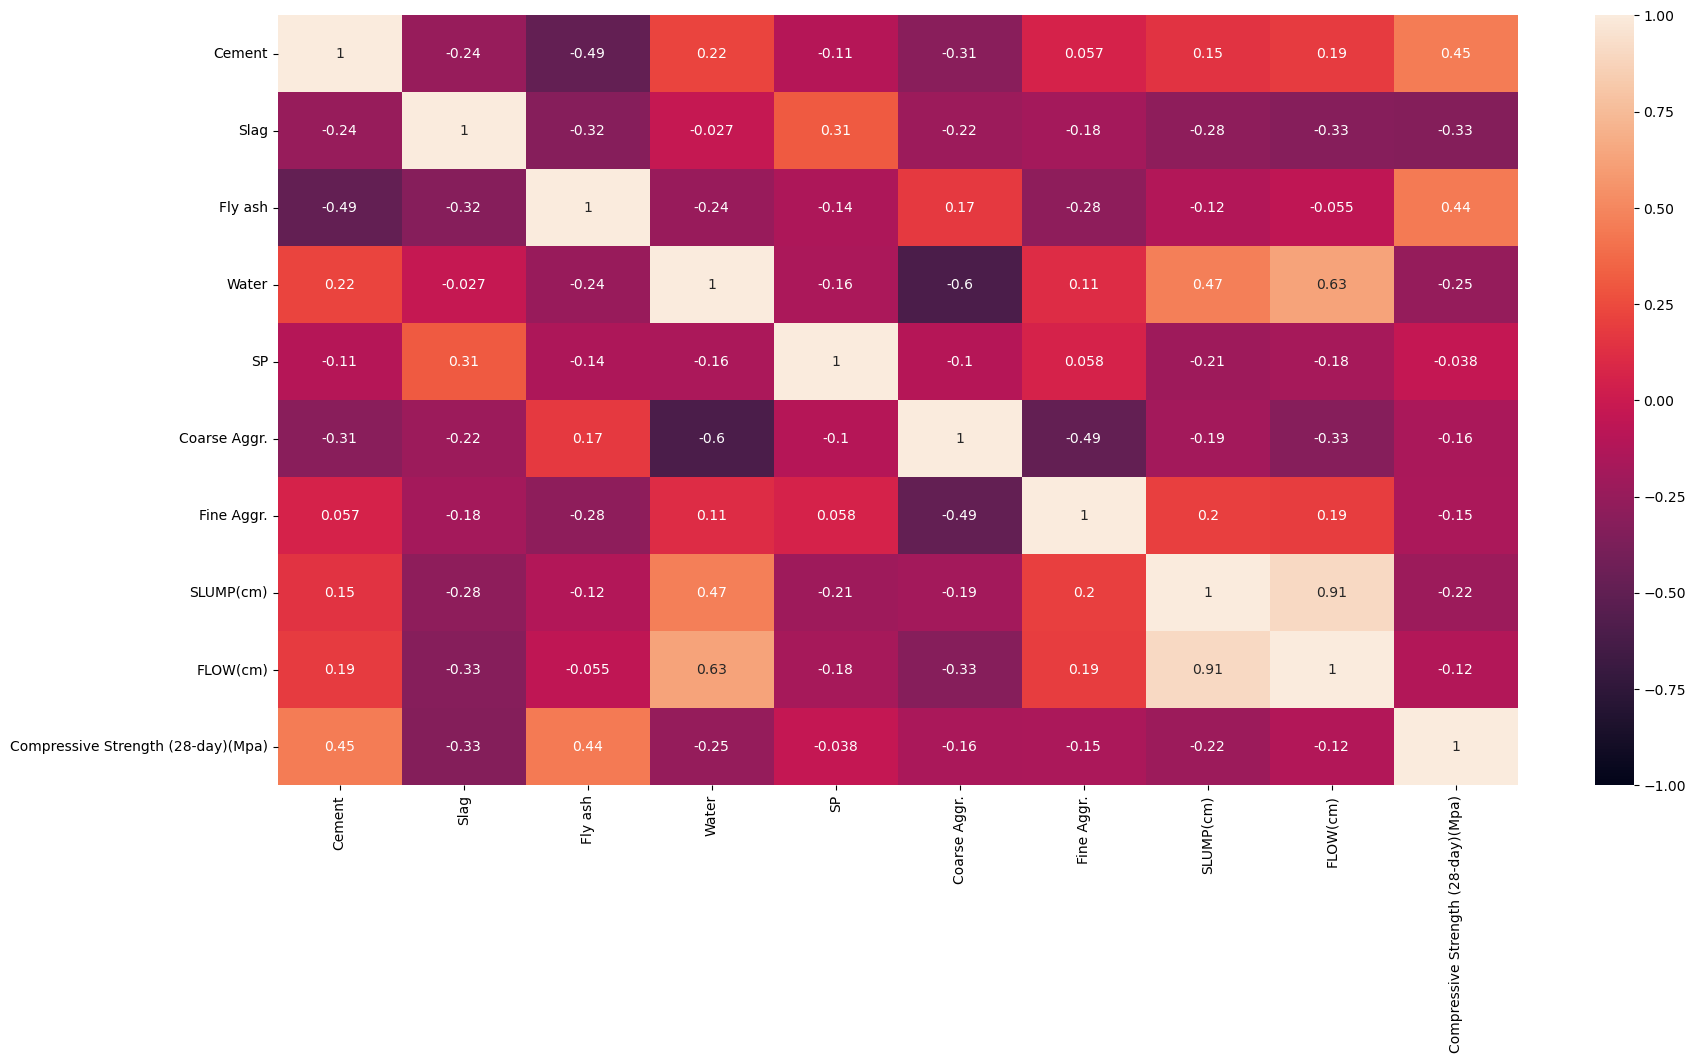

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)

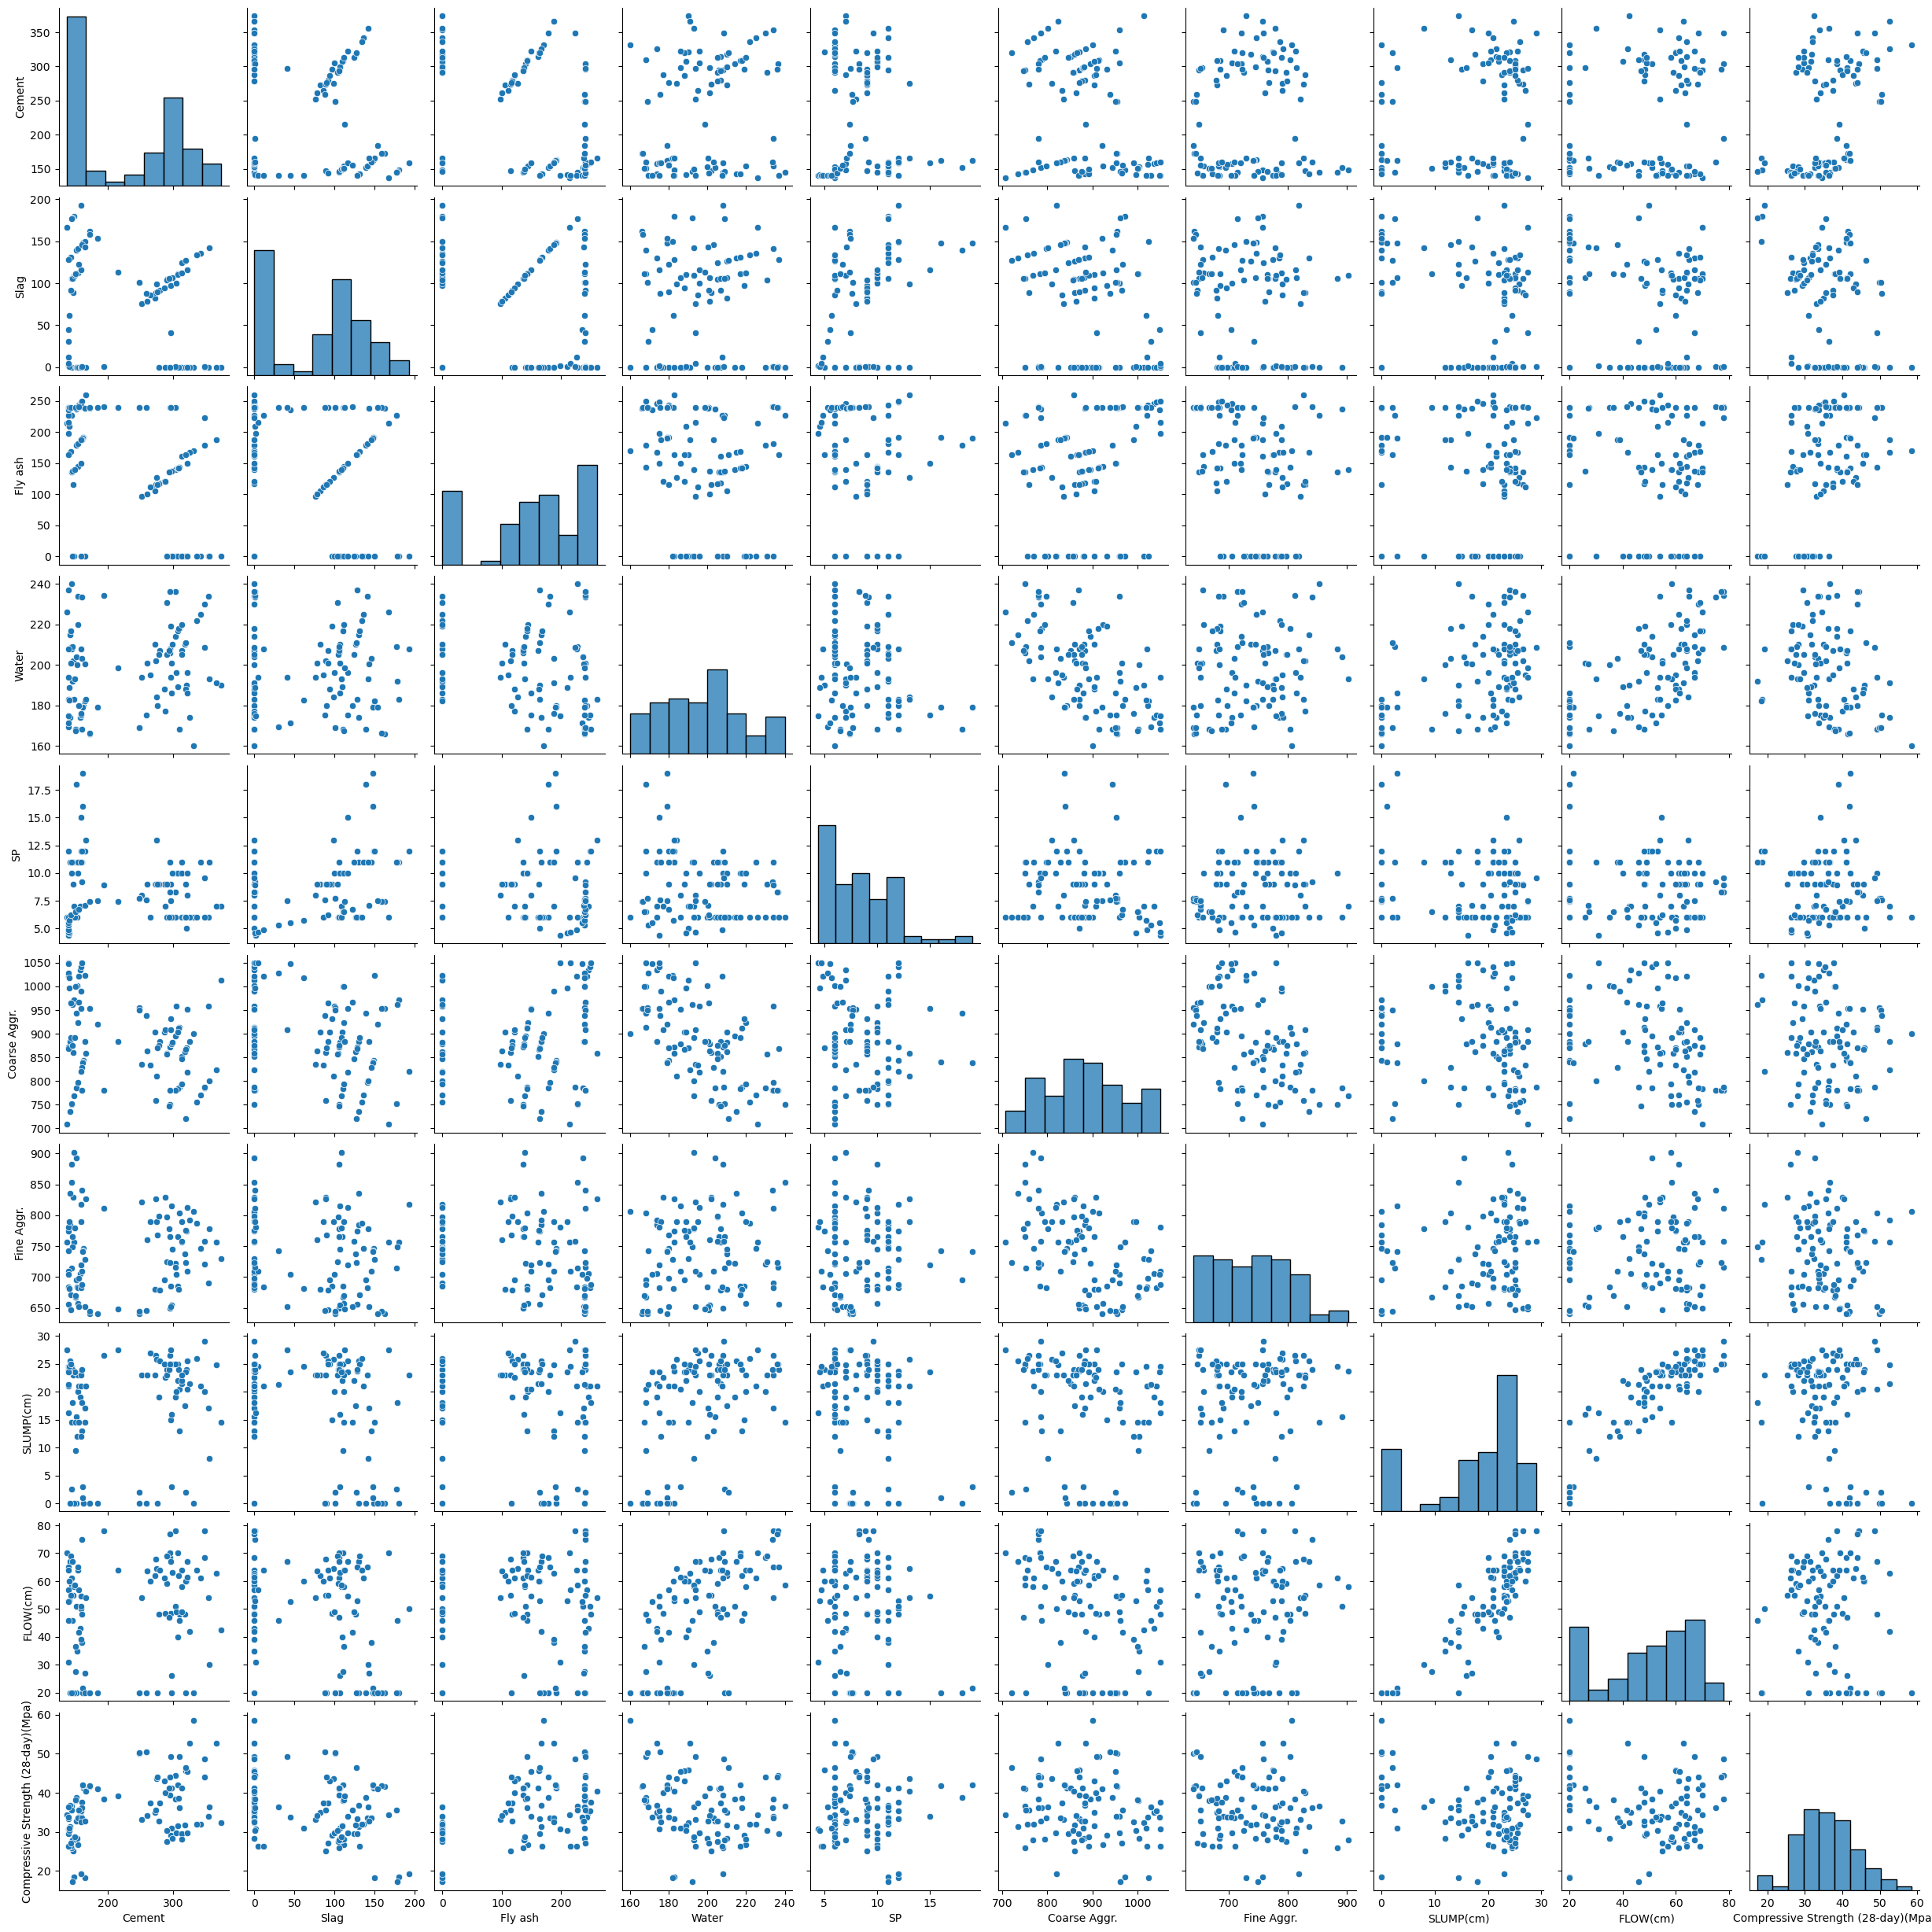

In [7]:
sns.pairplot(df)
plt.show()

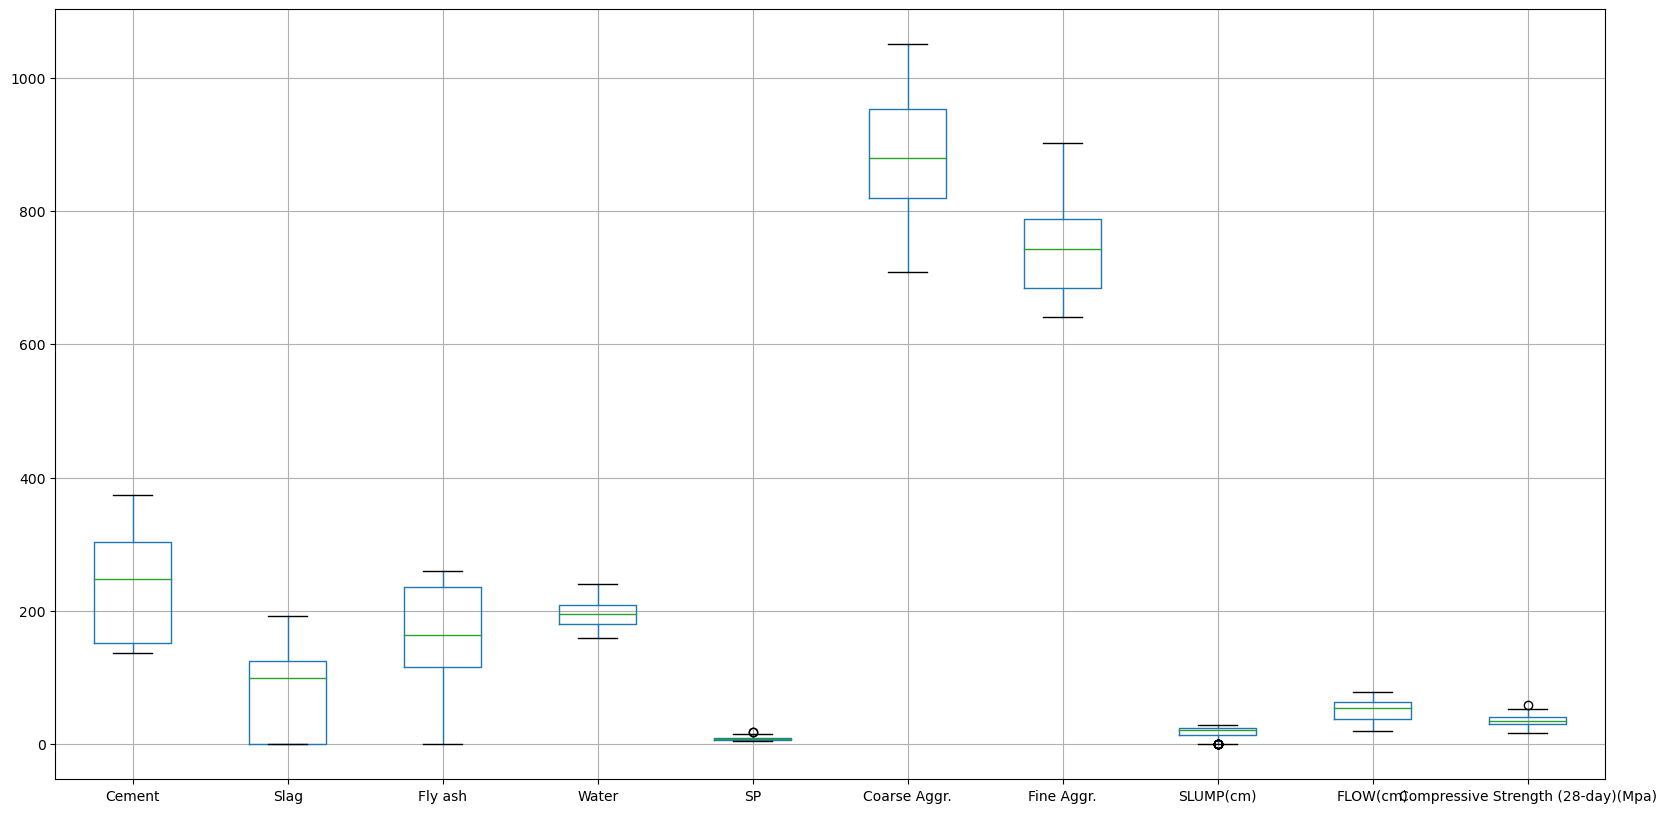

In [8]:
plt.figure(figsize =(20,10))
df.boxplot();

### Train | Test Split

In [9]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Scaling the Data

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [13]:
scaler = StandardScaler() # will be used in pipeline later

In [14]:
# if you don't use pipeline, you can use scaler directly
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [15]:
from sklearn.pipeline import Pipeline # pipeline is used to combine scaler and model

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # will be used in pipeline later

In [17]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)]) # pipeline is used to combine scaler and model

In [18]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [19]:
y_pred = pipe_lm.predict(X_test) # predict on test data
y_train_pred = pipe_lm.predict(X_train) # predict on train data

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [21]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # train and test scores
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


## Cross Validate

In [22]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [23]:
from sklearn.model_selection import cross_validate, cross_val_score

In [24]:
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [25]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.017698,0.008003,0.942208,-1.908524,-4.645188,-2.155270
2,0.018811,0.005167,0.706629,-2.647319,-10.756658,-3.279734
3,0.056052,0.000000,0.865934,-1.482831,-3.725762,-1.930223
4,0.015760,0.010679,0.923166,-2.244108,-8.434009,-2.904137
5,0.023730,0.008037,0.792889,-2.867905,-11.698265,-3.420273


In [26]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()


test_r2                             0.846165
test_neg_mean_absolute_error       -2.230137
test_neg_mean_squared_error        -7.851977
test_neg_root_mean_squared_error   -2.737927
dtype: float64

In [27]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


In [28]:
print("train RMSE:", 2.423698/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.737927/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725257718905493
CV RMSE: 0.07597177821060941


In [29]:
pipe_lm["lm"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [30]:
lm_df = pd.DataFrame(pipe_lm["lm"].coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,4.280152
1,-2.222880
2,3.932020
3,-4.770839
4,0.121100
5,-5.277291
6,-2.611313
7,-2.188378
8,1.465706


## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge_model = Ridge(alpha=1, random_state=42) # will be used in pipeline later


In [33]:
pipe_ridge = Pipeline([("scaler", scaler), ("ridge", ridge_model)]) # pipeline is used to combine scaler and model

In [34]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [35]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [36]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [37]:
pd.concat([ls, rs], axis=1)  # combine train and test scores to compare

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628


## For Ridge Regression CV with alpha : 1 

In [38]:
model = Pipeline([("scaler", scaler), ("ridge", ridge_model)])
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [39]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000000,0.015627,0.945011,-1.837154,-4.419908,-2.102358
2,0.015623,0.000000,0.708681,-2.651491,-10.681426,-3.268245
3,0.015625,0.000000,0.870580,-1.487804,-3.596664,-1.896487
4,0.015627,0.015626,0.920645,-2.255780,-8.710815,-2.951409
5,0.000000,0.015621,0.804676,-2.793295,-11.032516,-3.321523


In [40]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.849918
test_neg_mean_absolute_error       -2.205105
test_neg_mean_squared_error        -7.688266
test_neg_root_mean_squared_error   -2.708004
dtype: float64

In [41]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [42]:
pipe_ridge["ridge"].coef_

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [43]:
rm_df = pd.DataFrame(pipe_ridge["ridge"].coef_, columns = ["ridge_coef_1"])

In [44]:
pd.concat([lm_df,rm_df], axis = 1) 

,lm_coef,ridge_coef_1
0,4.280152,5.010922
1,-2.222880,-1.377652
2,3.932020,4.806274
3,-4.770839,-3.906449
4,0.121100,0.261385
5,-5.277291,-4.066443
6,-2.611313,-1.746605
7,-2.188378,-1.954987
8,1.465706,1.133500


## Choosing best alpha value with Cross-Validation

In [45]:
from sklearn.linear_model import RidgeCV

In [46]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [47]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error") # will be used in pipeline later

In [48]:
pipe_ridgecv = Pipeline([("scaler", scaler), ("ridgecv", ridge_cv_model)]) # pipeline is used to combine scaler and model

In [49]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [50]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [51]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)  

In [52]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827


In [53]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827


In [54]:
pipe_ridgecv["ridgecv"].coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [55]:
rcm_df = pd.DataFrame(pipe_ridgecv["ridgecv"].coef_, columns=["ridge_cv_coef_0.91"])

In [56]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
0,4.280152,5.010922,5.005213
1,-2.222880,-1.377652,-1.389454
2,3.932020,4.806274,4.796521
3,-4.770839,-3.906449,-3.931707
4,0.121100,0.261385,0.258058
5,-5.277291,-4.066443,-4.092323
6,-2.611313,-1.746605,-1.763298
7,-2.188378,-1.954987,-1.969969
8,1.465706,1.133500,1.155002


## LASSO

In [57]:
from sklearn.linear_model import Lasso, LassoCV

In [58]:
lasso_model = Lasso(alpha=1, random_state=42)

In [59]:
pipe_lasso = Pipeline([("scaler", scaler), ("lasso", lasso_model)]) # pipeline is used to combine scaler and model

In [60]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [61]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [62]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 

lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [63]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025


## For Lasso CV with Default Alpha : 1

In [64]:
model = Pipeline([("scaler", scaler), ("lasso", lasso_model)])
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [65]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.015627,0.000000,0.826285,-3.154233,-13.962787,-3.736681
2,0.000000,0.015625,0.499657,-3.387816,-18.345441,-4.283158
3,0.000000,0.000000,0.676319,-2.382057,-8.995287,-2.999214
4,0.015624,0.000000,0.681643,-4.372939,-34.945941,-5.911509
5,0.000000,0.000000,0.736091,-3.244457,-14.906371,-3.860877


In [66]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.683999
test_neg_mean_absolute_error        -3.308301
test_neg_mean_squared_error        -18.231165
test_neg_root_mean_squared_error    -4.158288
dtype: float64

In [67]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [68]:
model["lasso"].coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [69]:
lsm_df = pd.DataFrame(model["lasso"].coef_, columns = ["lasso_coef_1"])

In [70]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1
0,4.280152,5.010922,5.005213,4.821314
1,-2.222880,-1.377652,-1.389454,-0.000000
2,3.932020,4.806274,4.796521,4.880053
3,-4.770839,-3.906449,-3.931707,-0.819769
4,0.121100,0.261385,0.258058,0.000000
5,-5.277291,-4.066443,-4.092323,-0.351495
6,-2.611313,-1.746605,-1.763298,-0.000000
7,-2.188378,-1.954987,-1.969969,-0.710631
8,1.465706,1.133500,1.155002,-0.000000


### Choosing best alpha value with Cross-Validation

In [71]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42) # will be used in pipeline later

In [72]:
pipe_lassocv = Pipeline([("scaler", scaler), ("lassocv", lasso_cv_model)]) # pipeline is used to combine scaler and model

In [73]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [74]:
pipe_lassocv["lassocv"].alpha_

0.1

In [75]:
# Lasso(alpha =0.1)
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [76]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [77]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184


In [78]:
pipe_lassocv["lassocv"].coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [79]:
lcm_df = pd.DataFrame(pipe_lassocv["lassocv"].coef_, columns = ["lasso_cv_coef_0.1"])

In [80]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) # (7 fearures) test_r2 = 0.90

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1
0,4.280152,5.010922,5.005213,4.821314,6.360581
1,-2.222880,-1.377652,-1.389454,-0.000000,0.000000
2,3.932020,4.806274,4.796521,4.880053,6.448608
3,-4.770839,-3.906449,-3.931707,-0.819769,-2.385571
4,0.121100,0.261385,0.258058,0.000000,0.467338
5,-5.277291,-4.066443,-4.092323,-0.351495,-2.090038
6,-2.611313,-1.746605,-1.763298,-0.000000,-0.228233
7,-2.188378,-1.954987,-1.969969,-0.710631,-1.081774
8,1.465706,1.133500,1.155002,-0.000000,0.000000


## Elastic net

In [81]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [82]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio is used to control the amount of L1 and L2 regularization

In [83]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) # pipeline is used to combine scaler and model

In [84]:

pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [85]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [86]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [87]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [88]:
model = Pipeline([("scaler", scaler), ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))])

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [89]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.559420,-4.933674,-35.412716,-5.950858
2,0.466474,-3.311646,-19.562145,-4.422911
3,0.537252,-3.036801,-12.860032,-3.586089
4,0.540848,-5.517945,-50.401042,-7.099369
5,0.625048,-4.116153,-21.178438,-4.602004


In [90]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.545808
test_neg_mean_absolute_error        -4.183244
test_neg_mean_squared_error        -27.882875
test_neg_root_mean_squared_error    -5.132246
dtype: float64

In [91]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [92]:
pipe_elastic["elastic"].coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [93]:
em_df = pd.DataFrame(pipe_elastic["elastic"].coef_, columns=["elastic_coef_(alp:1, L1:0.5)"])

In [94]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
0,4.280152,5.010922,5.005213,4.821314,6.360581,2.616571
1,-2.222880,-1.377652,-1.389454,-0.000000,0.000000,-0.730153
2,3.932020,4.806274,4.796521,4.880053,6.448608,2.671399
3,-4.770839,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959
4,0.121100,0.261385,0.258058,0.000000,0.467338,0.000000
5,-5.277291,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868
6,-2.611313,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340
7,-2.188378,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696
8,1.465706,1.133500,1.155002,-0.000000,0.000000,-0.000000


## Grid Search for ElasticNet


In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) 

In [97]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) # pipeline is used to combine scaler and model

In [98]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [99]:
grid_model = GridSearchCV(estimator = pipe_elastic, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [100]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elast

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [101]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1}

In [102]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [103]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm


,elastic_grid_train,elastic_grid_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [104]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184


## Feature importances with Ridge

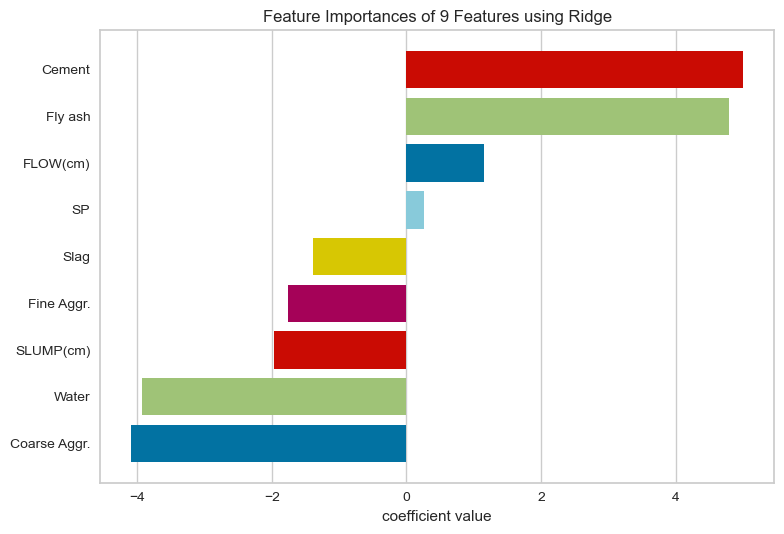

In [105]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();

## Feature importances with Lasso

In [106]:
pipe_lassocv["lassocv"].alpha_

0.1

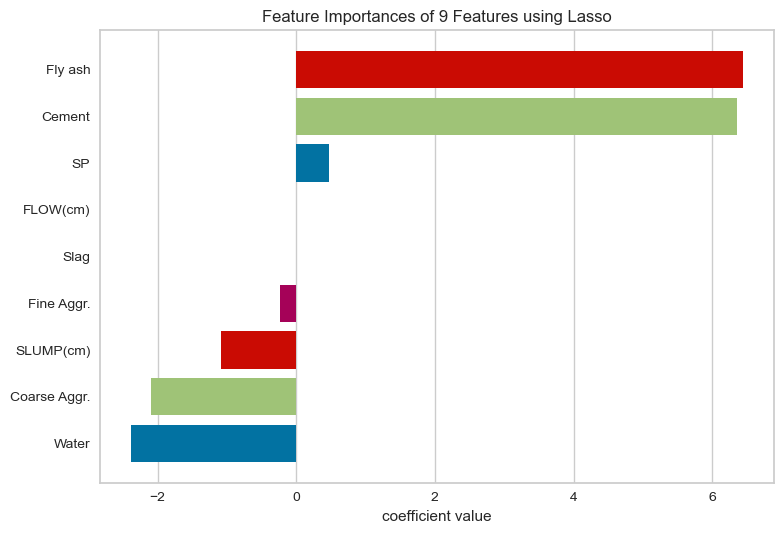

In [107]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();